In [2]:
import pandas as pd
import numpy as np

In [3]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)

cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
# Select only the columns with continuous values from - https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
car_num = cars[continuous_values_cols]
car_num.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


### Data Cleaning


In [5]:
# replace ? with numpay NaN
car_num = car_num.replace('?', np.nan)
car_num.head(3)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500


In [6]:
# convert all columns to float
car_num = car_num.astype('float')
# check for missing value
car_num.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [7]:
# Remove missing values from price column since it is the target variable
car_num = car_num.dropna(subset=['price'])
car_num.isnull().sum()


normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [8]:
# replacing other columns missing values with their respective means
car_num = car_num.fillna(car_num.mean())

In [9]:
# check for missing value to confirm inputation
car_num.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [10]:
# Normalizing the data to range from 0 to 1 except the target column
car_price = car_num['price']
car_num = (car_num - car_num.min()) / (car_num.max() - car_num.min())
car_num['price'] = car_price

### Univariate Model

In [11]:
from sklearn.neighbors  import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, data):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    # Randomixe the order of row in the data frame
    shuffled_index = np.random.permutation(data.index)
    rand_df = data.reindex(shuffled_index)
    
    # Divide number of rows in half and round
    middle_num = int(len(rand_df) / 2)
    
    # Select training amd testing set
    train_df = rand_df.iloc[0:middle_num]
    test_df = rand_df.iloc[middle_num:]
    
    # Fit model with default k value
    knn .fit(train_df[[train_col]], train_df[target_col])
    
    # Make predictions 
    pred_labels = knn.predict(test_df[[train_col]])
    
    # Calculate and return RMSE
    mse = mean_squared_error(test_df[target_col], pred_labels)
    rmse = np.sqrt(mse)
    return rmse

rmse_results = {}
train_cols = car_num.columns.drop('price')

# Training the model with each columns and the RMSE to the dictionary
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', car_num)
    rmse_results[col] = rmse_val
    
# Create a series from the dictionary for easy view
series_rmse = pd.Series(rmse_results)
series_rmse.sort_values()
    

engine-size          3271.201399
horsepower           3998.452040
curb-weight          4410.757785
width                4619.368133
city-mpg             5089.138311
highway-mpg          5180.535835
length               5419.972211
wheel-base           5465.236829
compression-rate     6276.684871
bore                 6760.263778
peak-rpm             7373.272378
height               7592.144535
normalized-losses    7627.705962
stroke               8371.272109
dtype: float64

In [12]:
def knn_train_test(train_col, target_col, data):
    np.random.seed(1)
    
    # Randomize the order of row in the data frame
    shuffled_index = np.random.permutation(data.index)
    rand_df = data.reindex(shuffled_index)
    
    # Divide number of rows in half and round
    middle_num = int(len(rand_df) / 2)
    
    # Select training amd testing set
    train_df = rand_df.iloc[0:middle_num]
    test_df = rand_df.iloc[middle_num:]
    
    k_values = [1,3,5,7,9]
    k_rmse = {}
    
    for k in k_values:
        # Fit model with default k 
        knn = KNeighborsRegressor(n_neighbors=k)
        knn .fit(train_df[[train_col]], train_df[target_col])
    
        # Make predictions 
        pred_labels = knn.predict(test_df[[train_col]])
    
        # Calculate and return RMSE
        mse = mean_squared_error(test_df[target_col], pred_labels)
        rmse = np.sqrt(mse)
        
        k_rmse[k] = rmse
    return k_rmse

k_rmse_results = {}
train_cols = car_num.columns.drop('price')

# Training the model with each columns and the RMSE to the dictionary
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', car_num)
    k_rmse_results[col] = rmse_val
    
    
k_rmse_results
    

{'normalized-losses': {1: 9280.94986710108,
  3: 6961.106163204347,
  5: 7627.705962288315,
  7: 7465.485034880281,
  9: 7720.068716566579},
 'wheel-base': {1: 4627.561273136604,
  3: 5121.630694446549,
  5: 5465.236829414088,
  7: 5507.5301610837805,
  9: 5752.08271403299},
 'length': {1: 5169.802314431087,
  3: 5215.57978375828,
  5: 5419.972211210776,
  7: 5300.668415477293,
  9: 5381.824915148057},
 'width': {1: 4718.212860189694,
  3: 4616.675183893205,
  5: 4619.368133208157,
  7: 4599.589728952111,
  9: 4654.512440739093},
 'height': {1: 7745.61191262447,
  3: 8041.040589866264,
  5: 7592.144534847831,
  7: 7720.696298574056,
  9: 7718.878210213232},
 'curb-weight': {1: 5520.943644230783,
  3: 5038.26321442437,
  5: 4410.7577852337345,
  7: 4367.457694896477,
  9: 4631.20477413208},
 'engine-size': {1: 3201.3594590640105,
  3: 2835.030228999319,
  5: 3271.2013993711125,
  7: 3609.823267842287,
  9: 3724.2100786361966},
 'bore': {1: 9618.718150121935,
  3: 7454.3205773985255,
  5

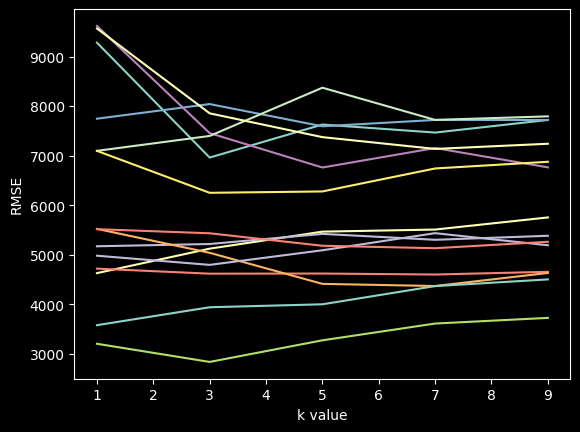

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

### Multivariate Model

In [14]:
# Compute average RMSE across different 'k' values for eadh features
feature_avg_rmse = {}
for k,v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
    
series_avg_rmse = pd.Series(feature_avg_rmse)
sort_avg_rmse = series_avg_rmse.sort_values()
print(sort_avg_rmse)

sorted_features = sort_avg_rmse.index

engine-size          3328.324887
horsepower           4076.233834
width                4641.671669
curb-weight          4793.725423
city-mpg             5097.581440
wheel-base           5294.808334
length               5297.569528
highway-mpg          5303.818305
compression-rate     6647.668952
bore                 7549.913081
stroke               7675.790929
height               7763.674309
normalized-losses    7811.063149
peak-rpm             7833.873154
dtype: float64


In [26]:
def knn_train_test(train_col, target_col, data):
    np.random.seed(1)
    
    # Randomize the order of row in the data frame
    shuffled_index = np.random.permutation(data.index)
    rand_df = data.reindex(shuffled_index)
    
    # Divide number of rows in half and round
    middle_num = int(len(rand_df) / 2)
    
    # Select training amd testing set
    train_df = rand_df.iloc[0:middle_num]
    test_df = rand_df.iloc[middle_num:]
    
    k_values = [5]
    k_rmse = {}
    
    for k in k_values:
        # Fit model with default k 
        knn = KNeighborsRegressor(n_neighbors=k)
        knn .fit(train_df[train_col], train_df[target_col])
    
        # Make predictions 
        pred_labels = knn.predict(test_df[train_col])
    
        # Calculate and return RMSE
        mse = mean_squared_error(test_df[target_col], pred_labels)
        rmse = np.sqrt(mse)
        
        k_rmse[k] = rmse
    return k_rmse

k_rmse_results = {}

# Training the model with each columns and the RMSE to the dictionary
for num_bst_feats in range(2,7):
    k_rmse_results[f'{num_bst_feats} best features'] = knn_train_test(
        sorted_features[:num_bst_feats],
        'price',
        car_num
    )
    
    
k_rmse_results
    

{'2 best features': {5: 2955.187607386625},
 '3 best features': {5: 3567.456573132758},
 '4 best features': {5: 3487.563298747749},
 '5 best features': {5: 3360.832156381264},
 '6 best features': {5: 3667.4622629683636}}

### Hyperparameter Tuning

In [28]:
def knn_train_test(train_col, target_col, data):
    np.random.seed(1)
    
    # Randomize the order of row in the data frame
    shuffled_index = np.random.permutation(data.index)
    rand_df = data.reindex(shuffled_index)
    
    # Divide number of rows in half and round
    middle_num = int(len(rand_df) / 2)
    
    # Select training amd testing set
    train_df = rand_df.iloc[0:middle_num]
    test_df = rand_df.iloc[middle_num:]
    
    k_values = [i for i in range(1, 25)]
    k_rmse = {}
    
    for k in k_values:
        # Fit model with default k 
        knn = KNeighborsRegressor(n_neighbors=k)
        knn .fit(train_df[train_col], train_df[target_col])
    
        # Make predictions 
        pred_labels = knn.predict(test_df[train_col])
    
        # Calculate and return RMSE
        mse = mean_squared_error(test_df[target_col], pred_labels)
        rmse = np.sqrt(mse)
        
        k_rmse[k] = rmse
    return k_rmse

k_rmse_results = {}

# Training the model with each columns and the RMSE to the dictionary
for num_bst_feats in range(2,6):
    k_rmse_results[f'{num_bst_feats} best features'] = knn_train_test(
        sorted_features[:num_bst_feats],
        'price',
        car_num
    )
    
    
k_rmse_results
    

{'2 best features': {1: 2450.2738763874804,
  2: 2661.9987126292162,
  3: 2793.550528548849,
  4: 2864.739225449104,
  5: 2955.187607386625,
  6: 3051.3008413228326,
  7: 3161.8029926093677,
  8: 3447.870716189476,
  9: 3788.4717994509742,
  10: 4076.9610506254326,
  11: 4185.068696931529,
  12: 4287.774725087223,
  13: 4379.380419432107,
  14: 4422.510853684792,
  15: 4532.435214548731,
  16: 4681.2635642500345,
  17: 4735.980331009335,
  18: 4790.924284707802,
  19: 4842.8352741445615,
  20: 4839.872589219291,
  21: 4839.343451354248,
  22: 4828.464675627526,
  23: 4860.8210277333355,
  24: 4902.3076518997805},
 '3 best features': {1: 3312.80766028748,
  2: 3496.1531741796916,
  3: 3339.0545523591495,
  4: 3359.448815514147,
  5: 3567.456573132758,
  6: 3719.8643263478903,
  7: 3645.5786538155767,
  8: 3744.921304333344,
  9: 3984.367185540151,
  10: 3994.924521449587,
  11: 4127.333398712259,
  12: 4272.235062338452,
  13: 4348.726710239621,
  14: 4325.585813432624,
  15: 4397.66973

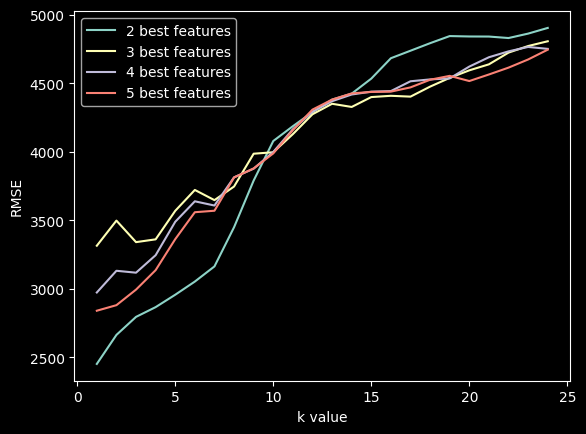

In [29]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())  
    plt.plot(x,y, label="{}".format(k))
    
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend()